In [1]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
df = pd.read_excel('C:/Users/PYTHON/Data Science Projects/Online Sales Project/Input/Online Retail.xlsx')
df.head()




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000001,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom


In [3]:
# set seed for reproducibility
np.random.seed(0)

# get the number of missing data points per column
missing_values_count = df.isnull().sum()
print(missing_values_count)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.149375633178264


<AxesSubplot:>

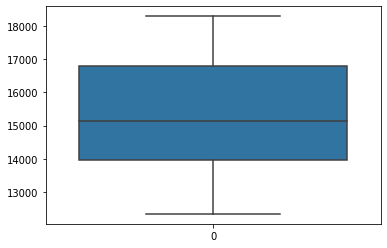

In [9]:
# check for outliers in the customer id column
import seaborn as sns
sns.boxplot(df['CustomerID'])

In [6]:
# Let's check the position of the outlier
print(np.where(df['CustomerID']>0.12))

(array([     0,      1,      2, ..., 541906, 541907, 541908], dtype=int64),)


In [7]:
# since the percentage of missing values is small we will drop the rows and check whether it will affect the nature of our data
df2 = df.dropna()
df2.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000001,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00.000001,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00.000002,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00.000002,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:33:59.999996,1.69,13047.0,United Kingdom


In [14]:
# check for missing values in the new dropped dataset
missing_values_count2 = df2.isnull().sum()
print(missing_values_count2)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


To create a new column of revenue, let's check whether the quantity column has non-negative values and the unit price  is not below $0

In [16]:
df2['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [17]:
# Boolean indexing
has_negative_quantity = (df['Quantity'] < 0).any()
print(has_negative_quantity)

True


In [20]:
# to create a check that ensures the "quantity"
# should not be below 1 unit, we'll use boolean indexing to filter out rows
# where the quantity is less than 1
invalid_quantity_rows = df2[df2['Quantity'] < 1]
print("Rows with quantity below 1 unit:")
print(invalid_quantity_rows)

# Number of rows with invalid quantites
num_invalid_rows = invalid_quantity_rows.shape[0]
print("Number of rows with quantity below 1 unit", num_invalid_rows)

# Remove the rows with invalid quantities from the data frame
# use the negation operator (~) in boolean indexing
valid_df = df2[df2['Quantity'] >= 1]

Rows with quantity below 1 unit:
       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                      InvoiceDate  UnitPrice  CustomerID         Country  
141

In [21]:
# check whether the negative values have been eliminated
valid_df['Quantity'].describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [23]:
# prices that are below $0
price_below0 = valid_df[valid_df['UnitPrice'] < 0]

print("Rows with prices below $0:")
print(price_below0)

# countof the number of rows with prices below $0
num_rows = price_below0.shape[0]
print("Number of rows with Unit Price below $0:", num_rows)

# remove the number of invalid rows from unit prices from the data frame
df3 = valid_df[valid_df['UnitPrice'] >= 1]

Rows with prices below $0:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Number of rows with Unit Price below $0: 0


In [25]:
#Lets check whether there is consistency with our data
# check for missing values
# run a summary statistics
# compae with the original dataset
df3.describe()

,Quantity,UnitPrice,CustomerID
count,304911.000000,304911.000000,304911.000000
mean,10.255898,3.883633,15297.045351
std,201.446073,25.192849,1711.528333
min,1.000000,1.000000,12346.000000
25%,2.000000,1.650000,13975.000000
50%,4.000000,2.460000,15153.000000
75%,10.000000,4.250000,16805.000000
max,80995.000000,8142.750000,18287.000000


In [27]:
missing_values_count3 = df3.isnull().sum()
print(missing_values_count)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [30]:
# it seems we have not dealt with our missing values properly.
# Let's fill the missing Customer ID with mean
df3_copy = df3.copy()
df3_copy['CustomerID'].fillna(df3['CustomerID'].mean(), inplace=True)

In [31]:
# Fill the Description column using its own most frequent value
df4 = df3_copy['Description'].fillna(df3_copy.mode().iloc[0])

In [32]:
df4.describe()

count                                 304911
unique                                  3230
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2028
Name: Description, dtype: object

In [33]:
df4.head()

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

In [34]:
df3_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000001,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom


In [35]:
df3_copy.describe()

,Quantity,UnitPrice,CustomerID
count,304911.000000,304911.000000,304911.000000
mean,10.255898,3.883633,15297.045351
std,201.446073,25.192849,1711.528333
min,1.000000,1.000000,12346.000000
25%,2.000000,1.650000,13975.000000
50%,4.000000,2.460000,15153.000000
75%,10.000000,4.250000,16805.000000
max,80995.000000,8142.750000,18287.000000


In [36]:
df5 = df3_copy.fillna(df3_copy.mode().iloc[0])

In [37]:
df5.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,304911.000000,304911.000000,304911.000000,304911.000000
mean,560347.887164,10.255898,3.883633,15297.045351
std,13175.955228,201.446073,25.192849,1711.528333
min,536365.000000,1.000000,1.000000,12346.000000
25%,548712.000000,2.000000,1.650000,13975.000000
50%,561592.000000,4.000000,2.460000,15153.000000
75%,571926.000000,10.000000,4.250000,16805.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [38]:
df5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000001,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom


In [39]:
# Let's check for missing values again
missing_values_count4 = df5.isnull().sum()
print(missing_values_count4)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [40]:
df5['Quantity'].describe()

count    304911.000000
mean         10.255898
std         201.446073
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [42]:
df5['InvoiceDate'].dtype

dtype('<M8[ns]')

In [44]:
%pip install fuzzywuzzy

In [46]:
# lets check the country column if there are any inconsistences
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer


In [47]:
countries = df5['Country'].unique()

# sort them alphabetically 
countries.sort()
countries

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype=object)

# Data Analysis and Visualization

In [48]:
df5.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000001,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000001,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00.000001,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00.000001,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00.000002,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00.000002,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:33:59.999996,1.69,13047.0,United Kingdom
